In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-for-bta-419-2023/BTA_419_2023_Data.csv


# Project Introduction
### About the Dataset
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


### What is a Term Deposit?  
"A term deposit, also known as a certificate of deposit (CD) or time deposit, is a low-risk, interest-bearing savings account. In most cases, term deposit holders place their funds into an account with a bank or financial institution and agree not to withdraw the funds until the maturity date (the end of the term). The funds can earn interest calculated based on the amount deposited and the term" - [SoFi](https://www.sofi.com/learn/content/what-is-a-term-deposit/)


### Goal of the project
The primary goal of this project is to identify which data variables are most likely to sign up for a term deposit. To examine any correlations with the term deposit, I'll start by using straightforward statistical visualizations. In addition, a decision tree model and logistic regression will be utilized to determine results for my business question.


### Source  

Kaggle dataset used for this project: [https://www.kaggle.com/datasets/aikath/bank-data-test](https://www.kaggle.com/datasets/aikath/bank-data-test)
  
 Original dataset: [http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)


 ------------------------------------------------------------------------------------------------------------------------------------------------------
### Business Question
<span style="color:red"> Do the client's age and job factor into their decision to subscribe to a term deposit? </span>
### Executive Summary


#### Decision Tree (Random Forest Model):  

For my project, I chose to use a random forest model to help answer my business question about whether age and job variables play a role in subscribing to a term deposit. Among all the categories of bank data listed in the **Summary of Dataset Columns** below, the **Bank client data** category stood out to me the most, as demographic data can provide valuable insights into the behvaiors of various customer groups, helping to identify the target market for term deposit subscriptions. Regarding my choice of model, I selected the random forest model for several reasons:

1) has high accuracy since it builds multiple decision trees instead of one  

2) produces good predictions that can be understood easily  

3) can handle large datasets efficiently

In relation to demographic data, I want to use every variable except **default** as it's not relevant to my interests. Additionally, using multiple variables will be beneficial for the random forest model, as it requires a minimum of three to five variables to produce good performance. Although I could only use the age, job, and term deposit response variable for my model, the training and test set would be limited. The performance of the three variable model will still be acceptable, but it's good to have more variables as the output produces interesting results. In addition to the random forest model, featured importance was also utilized. 


#### Project Finding #1 (Random Forest/Feature Importance):
- The accuracy score of our model is approximately **75%**
- When checking variable importance with feature importance:
    - **age** has the highest importance with approximately **60%**
    - **job** has the second highest importance with approximately **17%**
    - **education** has the third highest importance with approximately **11%**
    - **marital** has the third least importance with approximately **5%**
    - **housing** has the second least importance with approximately **3%**
    - **loan** has the least importance with approximately **3%**  


#### Confusion Matrix/Classification Report:
To further evaluate the random forest model accuracy score **(75%)**, the confusion matrix and classification report was used. Even though the accuracy score isn't 100% perfect, the confusion matrix was balanced. If I had more time on this project, I would've adjusted some parameters to improve the accuracy score. The confusion matrix and classification report was to verify the random forest model performance was acceptable.

In the confusion matrix:
- **7,488 (top left)** and **9,056 (bottom right)** are the positive (actual) predictions the model made
    - 9,056 clients subscribed
    - 7,488 clients didn't subscribe
- **3,517 (top right)** and **1,868 (bottom left)** are the negative (incorrect) predictions the model made
    - 3,517 clients didn't subscribe
    - 1,868 clients did subscribe

In the classification report:
- **Precision**
    - **80%** of the predicted outcomes were classified negative
    - **72%** of the predicted outcomes were classified positive
- **Recall**
    - **68%** of the negative outcomes were identified as "didn't subcribe"
    - **83%** of the positive outcomes were identified as "subscribed"
- **f1-score**
    - weighted average for the "didn't subcribe" group was **74%**
    - weighted average for the "subscribed" group was **77%**
- **accuracy**
    - overall accuracy of the random forest model is **75%**
- **macro avg**
    - precision, recall, and f1-score were around **75-76%**


    
#### Project Findings #2 (Age and Job group Feature Importance Analysis):
- Since age and job has the highest importance plus relates to my business question, I categorize their values into subgroups to find any correlations:
    - Majority of the clients who agreed to subscribe to a term deposit were in their middle ages **(between the ages of 30-60)**
      - **9.72% (3,226)** of the middle age group population **(33,186)** subcribed to a term deposit  
    - The teen and young adult age group has the most evenly distributed clients who both agreed and disagreed to a term deposit subscription
      - **42.42% (14)** of the teen group population **(33)** subscribed to a term deposit
      - **34.45% (72)** of the young adult group population **(209)** subscribed to a term deposit  
    - If prioritizing between blue-collar and white-collar jobs, blue-collar jobs make up most of the dataset **(6,065)** compared to white-collar jobs **(2,516)**
    - Blue-collar jobs has the highest count of term deposit subscriptions **(911 or 15.02%)** compared to white-collar jobs  with the lowest count of subscriptions **(230 or 9.14%)**


<h4 align="center">Age group</h4>

| Subscribed? | No | Yes | Subscribed % |
| :------: | :------: | :------: | :------: | 
| Teen | 19 | 14 | 42.42% |
| Young Adult | 137 | 72 | 34.45% |
| Official Adult | 6103 | 1038 | 14.54% |
| Middle Age | 29960 | 3226 | 9.72% |
| Elderly | 329 | 290 | 46.85% |



<h4 align="center">Job group</h4>

| Subscribed? | No | Yes | Subscribed % |
| :------: | :------: | :------: | :------: | 
| White-collar jobs | 2286 | 230 | 9.14% |
| Blue-collar jobs | 5154 | 911 | 15.02% |
| Other | 11422 | 1509 | 11.67% |



 ------------------------------------------------------------------------------------------------------------------------------------------------------

# Summary of Dataset Columns  
The following details provide a brief definition of each column.

### Bank client data:
1 - **age:** (numeric)  

2 - **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  

3 - **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - **education:** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') 

5 - **default:** has credit in default? (categorical: 'no','yes','unknown')

6 - **housing:** has housing loan? (categorical: 'no','yes','unknown')  

7 - **loan:** has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:  
8 - **contact:** contact communication type (categorical: 'cellular','telephone')  

9 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 

10 - **day_of_week:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  

11 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  

### Other attributes:
12 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)  

13 - **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  

14 - **previous:** number of contacts performed before this campaign and for this client (numeric)  

15 - **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
  
### Social and Economic context attributes:
16 - **emp.var.rate:** employment variation rate - quarterly indicator (numeric)  

17 - **cons.price.idx:** consumer price index - monthly indicator (numeric)  

18 - **cons.conf.idx:** consumer confidence index - monthly indicator (numeric)  

19 - **euribor3m:** euribor 3 month rate - daily indicator (numeric)  

20 - **nr.employed:** number of employees - quarterly indicator (numeric)  

### Output variable (desired target):
21 - **y** - has the client subscribed a term deposit? (binary: 'yes','no')


 ------------------------------------------------------------------------------------------------------------------------------------------------------

# Data Exploration  
Here are the initial steps I did to quickly examine the bank dataset before diving in deep.  
  
### Loading in the CSV file
The CSV file must be loaded into the project as the first step by importing the Pandas function. From there, I called the function, <span style="color:blue;"> .read_csv() </span> using the variable "account" to read the CSV file and turn it into a DataFrame object. I then returned the DataFrame by using the <span style="color:blue;"> .head() </span> function to inspect the first five rows of the data. Executing the <span style="color:blue;"> .head() </span> function allows me to get a sense of the DataFrame's contents and an overview of the data.

In [3]:
import pandas as pd
account = pd.read_csv('/kaggle/input/dataset-for-bta-419-2023/BTA_419_2023_Data.csv')

# returns the first few rows of the DataFrame. Useful to get a brief summary of the dataset
account.head() 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Description of the Dataset  
In addition to the data overview, I used the function, <span style="color:blue;"> .info() </span> to understand the structure and size of the dataset. Based on the code below, this dataset contains the following:   

1. Has no null values since all of the columns are labeled non-null
2. Contains 41,188 records and 20 columns. Out of the 20 columns, three types of columns exist:  

    - **11 object columns (object)**
        - job
        - martial
        - education
        - default
        - housing
        - loan
        - contact
        - month
        - day_of_week
        - poutcome
        - y  
   
    - **5 integer columns (int64)**
        - age
        - duration
        - campaign
        - pdays
        - previous  
        
    - **5 float columns (float64)**
        - emp.var.rate
        - cons.price.idx
        - cons.conf.idx
        - euribor3m
        - nr.employed  
      
      

In [12]:
# .info is a method that outputs a summary of the csv file, such as: number of rows, columns, data types, and memory usage
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Looking at columns
account.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
# Contains 41,188 records and 20 columns
account.shape

(41188, 21)

### Exploring Categorical Columns 

They're 11 categorical columns, and out of all of them, job has the highest categorical feature

In [22]:
# COUNTING THE NUMBER OF UNIQUE VALUES IN EACH CATEGORICAL FEATURE

print("The 'job' column has {} unique values.".format(account['job'].nunique()))
print("The 'marital' column has {} unique values.".format(account['marital'].nunique()))
print("The 'education' column has {} unique values.".format(account['education'].nunique()))
print("The 'default' column has {} unique values.".format(account['default'].nunique()))
print("The 'housing' column has {} unique values.".format(account['housing'].nunique()))
print("The 'loan' column has {} unique values.".format(account['loan'].nunique()))
print("The 'contact' column has {} unique values.".format(account['contact'].nunique()))
print("The 'month' column has {} unique values.".format(account['month'].nunique()))
print("The 'day_of_week' column has {} unique values.".format(account['day_of_week'].nunique()))
print("The 'poutcome' column has {} unique values.".format(account['poutcome'].nunique()))
print("The 'y' column has {} unique values.".format(account['y'].nunique()))

The 'job' column has 12 unique values.
The 'marital' column has 4 unique values.
The 'education' column has 8 unique values.
The 'default' column has 3 unique values.
The 'housing' column has 3 unique values.
The 'loan' column has 3 unique values.
The 'contact' column has 2 unique values.
The 'month' column has 10 unique values.
The 'day_of_week' column has 5 unique values.
The 'poutcome' column has 3 unique values.
The 'y' column has 2 unique values.


In [27]:
# OUTPUTTING THE CATEGORICAL COLUMNS

cat_account = account.select_dtypes(include=['object'])
print(cat_account.head())

         job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no  


### Exploring Numerical Columns 

They're 10 numerical columns

In [28]:
# OUTPUTTING THE NUMERICAL COLUMNS

num_account = account.select_dtypes(include=['number'])
print(num_account.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0  


 ------------------------------------------------------------------------------------------------------------------------------------------------------

# Part 1: Statistical Visualization
The following sections below consists of exploring interested variables that may display correlation to a term deposit subsccription. Out of all the variables from the bank dataset, these are the variables I'm interested in for further analysis, espcially the relationship between "y", "age", and "job":
- **y** (yes or no response to subscribing to a term deposit)
- **age**
- **marital** 
- **job**
- **education**
- **housing** (yes or no response to having housing loans)
- **loan** (yes or no response to having personal loans)


### Term Deposit Subscription
**89%** of the clients have not subcribed to a term deposit while **11%** of the clients have subscribed



Text(0, 0.5, 'Count')

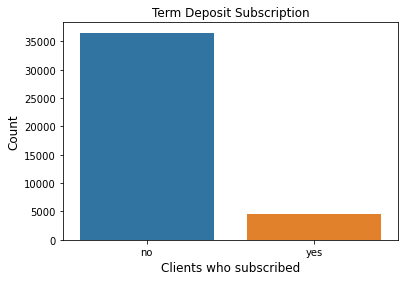

In [11]:
# BAR PLOT OF TERM DEPOSIT SUBSCRIPTION

# importing data visualization module, seaborn to create plots
import seaborn as sns 

plt.figure(figsize=(6, 4)) #increase plot size with a width of 6 in and height of 4 in
sns.countplot(data = account, x ='y')

# Adding plot title and labels
plt.title("Term Deposit Subscription", fontsize = 12)
plt.xlabel("Clients who subscribed", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

In [4]:
# counting the number of clients with count and decimals
y_count = account["y"].value_counts()
y_decimal = y_count / len(account)

# creating a new DataFrame with counts and decimal values for each column
y_table = pd.DataFrame({'Count': y_count, 'Decimal': y_decimal})

print(y_table)


     Count   Decimal
no   36548  0.887346
yes   4640  0.112654


### Age Distribution

Based on the summary statistic and histogram, the:
- Minimum age is **17 years old**
- Maximum age is **98 years old**
- Average age is approximately **40 years old**

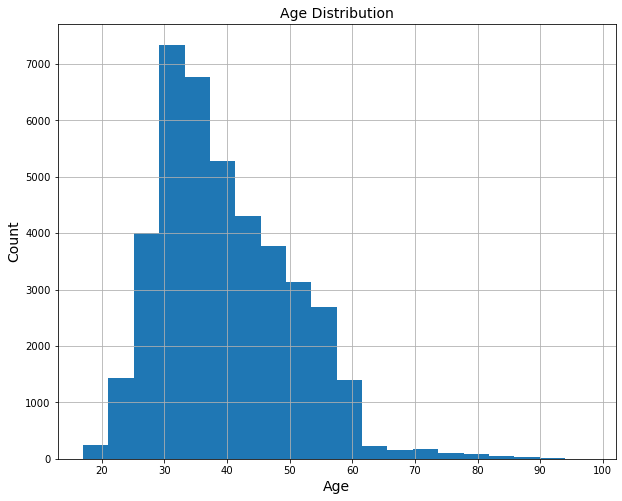

In [8]:
# HISTOGRAM OF AGE

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8)) #increase plot size with a width of 10 in and height of 8 in
account["age"].hist(bins=20) #bins is the number of bars displayed on the histogram

# Adding plot title and labels
plt.title("Age Distribution", fontsize = 14)
plt.xlabel("Age", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

plt.show()

In [11]:
# The describe method computes some summary statistics for numerical columns
account.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Marital Status

The bar plot shown above shows the following marital status:
- **60% (24,928)** clients are married
- **28% (11,568)** clients are single
- **11% (4,612)** clients are divorced

In [6]:
# counting marital status in counts decimal
marital_count = account["marital"].value_counts()
marital_decimal = marital_count / len(account)

# dropping the "unknown" row in marital status
account = account.drop(account[account.marital.isin(['unknown'])].index)

# creating a new DataFrame with counts and decimal values 
marital_table = pd.DataFrame({'Count': marital_count, 'Decimal': marital_decimal})

print(marital_table)

          Count   Decimal
married   23733  0.605851
single    11025  0.281444
divorced   4415  0.112705


### Job 
According to the job table below, adminstrators make up **25%** of the dataframe

In [4]:
# counting job in counts and decimal
job_count = account["job"].value_counts()
job_decimal = job_count / len(account)

# dropping the "unknown" row in job
account = account.drop(account[account.job.isin(['unknown'])].index)

# creating a new DataFrame with counts and decimal values 
job_table = pd.DataFrame({'Count': job_count, 'Decimal': job_decimal})

print(job_table)

               Count   Decimal
admin.         10172  0.259225
blue-collar     8792  0.224057
technician      6531  0.166437
services        3819  0.097324
management      2801  0.071381
retired         1619  0.041259
entrepreneur    1397  0.035601
self-employed   1389  0.035398
housemaid       1017  0.025917
unemployed       995  0.025357
student          708  0.018043


### Education
Clients with university degrees make up approximately **30%** of the dataframe

In [2]:
# dropping the "unknown" and "illiterate" row in education
account = account.drop(account[account.education.isin(['unknown', 'illiterate'])].index)

# counting education in counts and decimal
education_count = account["education"].value_counts()
education_decimal = education_count / len(account)

# creating a new DataFrame with counts and decimal values 
education_table = pd.DataFrame({'Count': education_count, 'Decimal': education_decimal})

print(education_table)

                     Count   Decimal
university.degree    12168  0.308527
high.school           9515  0.241259
basic.9y              6045  0.153275
professional.course   5243  0.132939
basic.4y              4176  0.105885
basic.6y              2292  0.058115


### Housing
**54%** of clients owes a housing loan and **46%** of clients don't.

In [6]:
# counting housing in counts and decimal
housing_count = account["housing"].value_counts()
housing_decimal = housing_count / len(account)

# dropping the "unknown" row in housing
account = account.drop(account[account.housing.isin(['unknown'])].index)

# Recalculating housing count and decimal 
housing_count = account['housing'].value_counts()
housing_decimal = housing_count / len(account)

# creating a new DataFrame with counts and decimal values 
housing_table = pd.DataFrame({'Count': housing_count, 'Decimal': housing_decimal})

print(housing_table)

     Count   Decimal
yes  21576  0.536743
no   18622  0.463257


### Loans
In the loan table below, **16%** of our clients owe personal loans while **84%** of clients don't. 

In [7]:
# counting loan in counts and decimal
loan_count = account['loan'].value_counts()
loan_decimal = loan_count / len(account)

# dropping the "unknown" row in loans
account = account.drop(account[account.loan.isin(['unknown'])].index)

# Recalculating loan count and decimal 
loan_count = account['loan'].value_counts()
loan_decimal = loan_count / len(account)

# creating a new DataFrame with counts and decimal 
loan_table = pd.DataFrame({'Count': loan_count, 'Decimal': loan_decimal})

print(loan_table)

     Count   Decimal
no   33950  0.844569
yes   6248  0.155431


 ------------------------------------------------------------------------------------------------------------------------------------------------------

# Part 2: Variable Relationship to Term Deposit Subscription
The next section is exploring the relationship between the selected variables and term deposit subscription to find any patterns before conducting my model. 

### Relationship between Age & Term Deposit Subscription 

Clients in the age range between **30-35** are more likely to subscribe to a term deposit.

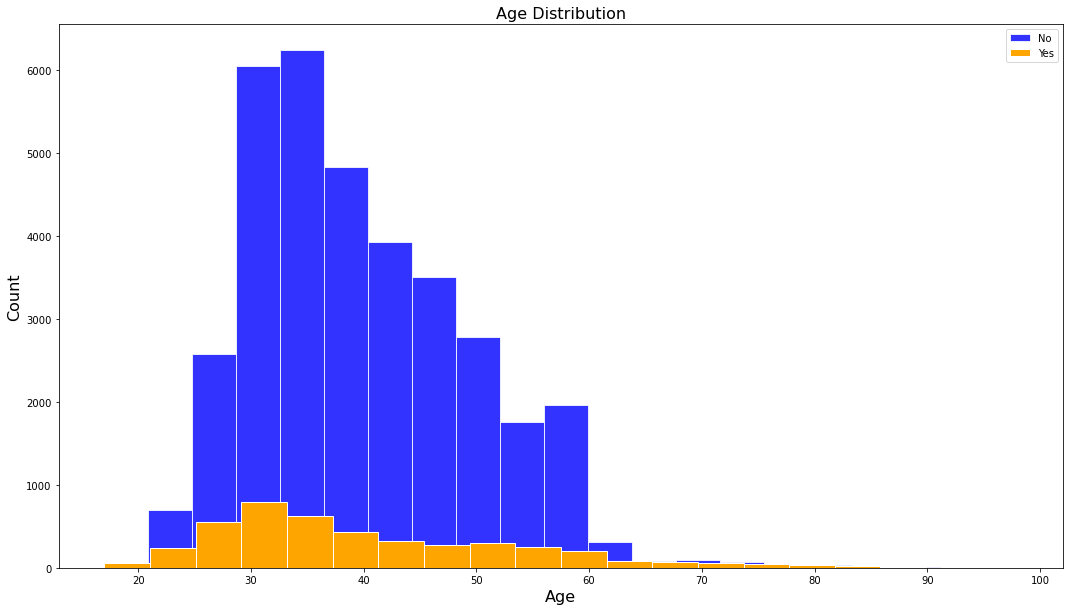

In [24]:
# selecting the rows of the y column that has either yes or no
subscribed = account[account["y"] == "yes"]
not_subscribed = account[account["y"] == "no"]

# Creating a new figure and subplot
figures, x = plt.subplots(figsize = (18, 10))  #increase plot size with a width of 10 in and height of 8 in

# Histogram of the relationship between age and term deposit subscription
hist2 = x.hist(not_subscribed["age"], color = "blue", alpha = 0.8, bins = 20, edgecolor = "white")
hist1 = x.hist(subscribed["age"], color = "orange", alpha = 1.0, bins = 20, edgecolor = "white")

# Adding plot title and labels
plt.title("Age Distribution", fontsize = 16)
plt.xlabel("Age", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.legend(["No", "Yes"])

plt.show()

### Relationship between Marital Status & Term Deposit Subscription 

Clients who are married are more likely to subcribe to a term deposit **(55%)** compared to clients who are single **(35%)** or divorced **(10%)**. 

Text(0, 0.5, 'Term Deposit Subscription')

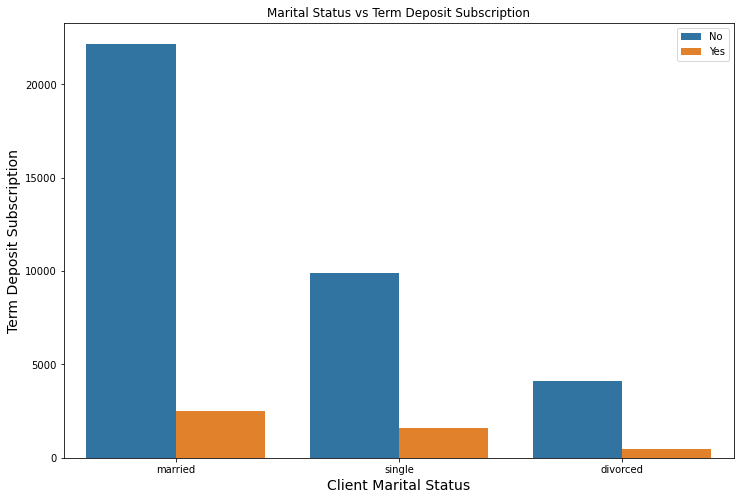

In [31]:
# dropping the "unknown" row in marital status
account = account.drop(account[account.marital.isin(['unknown'])].index)

#increasing plot size with a width of 12 in and height of 8 in
plt.figure(figsize=(12, 8)) 
sns.countplot(data=account, x='marital', hue='y')

# Adding plot title and labels
plt.title("Marital Status vs Term Deposit Subscription")
plt.legend(["No", "Yes"])
plt.xlabel("Client Marital Status", fontsize = 14)
plt.ylabel("Term Deposit Subscription", fontsize = 14)

In [11]:
# creating marital table
marital_table['Yes'] = account[account['y'] == 'yes']['marital'].value_counts() / len(account[account['y'] == 'yes'])
marital_table['No'] = account[account['y'] == 'no']['marital'].value_counts() / len(account[account['y'] == 'no'])

# keeping only the Yes and No columns using .loc
marital_table = marital_table.loc[:, ['Yes', 'No']]

print(marital_table)

               Yes        No
married   0.545690  0.612783
single    0.349138  0.272190
divorced  0.102586  0.113166


### Relationship between Jobs & Term Deposit Subscription 

Administrators **(30%)**, blue-collar **(14%)**, and technicians **(16%)** are the top three jobs with a high term deposit subscription rate. 

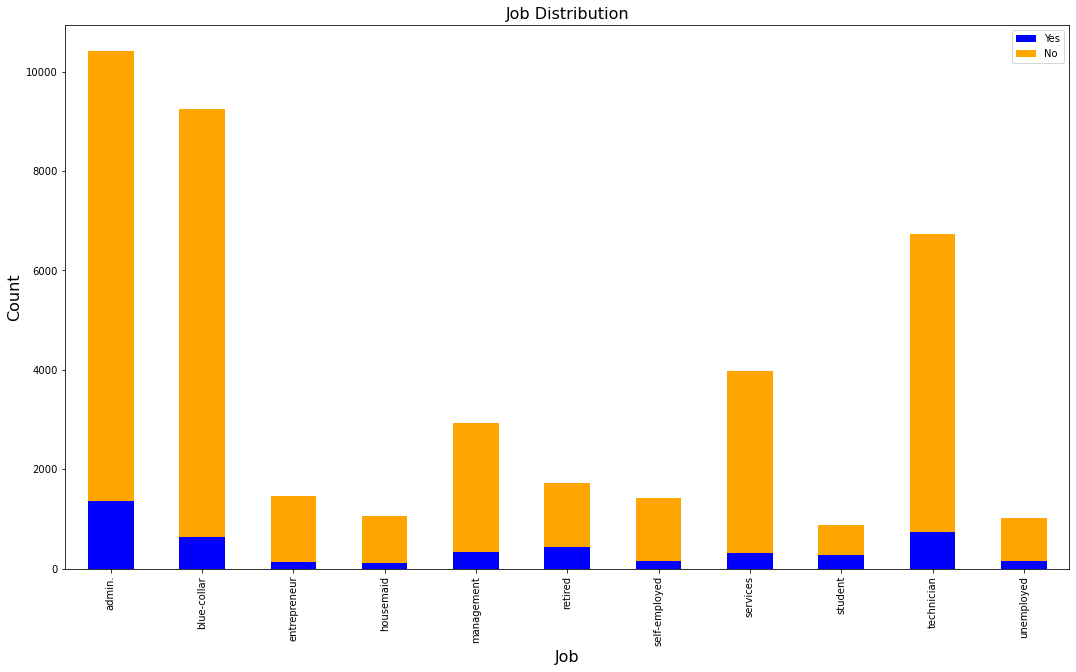

In [29]:
# dropping the "unknown" row in job
account = account.drop(account[account.job.isin(['unknown'])].index)

# selecting the rows of the y column with yes or no
subscribed = account[account["y"] == "yes"]
not_subscribed = account[account["y"] == "no"]

# counting the number of occurrences of each job 
subscribed_counts = subscribed['job'].value_counts()
not_subscribed_counts = not_subscribed['job'].value_counts()

# combining the counts into a single dataframe
df = pd.DataFrame({'Yes': subscribed_counts, 'No': not_subscribed_counts})

# creating a stacked side bar graph
ax = df.plot(kind='bar', stacked=True, figsize=(18, 10), color = ['blue', 'orange'])

# Adding plot title and labels
plt.title("Job Distribution", fontsize = 16)
plt.xlabel("Job", fontsize = 16)
plt.ylabel("Count", fontsize = 16)

plt.show()

In [47]:
# creating job table
job_table['Yes'] = account[account['y'] == 'yes']['job'].value_counts() / len(account[account['y'] == 'yes'])
job_table['No'] = account[account['y'] == 'no']['job'].value_counts() / len(account[account['y'] == 'no'])

# keeping only the Yes and No columns using .loc
job_table = job_table.loc[:, ['Yes', 'No']]

print(job_table)

                    Yes        No
admin.         0.299658  0.252696
blue-collar    0.140023  0.233297
technician     0.160775  0.166201
services       0.069327  0.100274
management     0.070239  0.071119
retired        0.090992  0.034803
entrepreneur   0.027138  0.036458
self-employed  0.033295  0.035460
housemaid      0.023033  0.026131
unemployed     0.031699  0.024419
student        0.049259  0.014035


### Relationship between Education & Term Deposit Subscription 

Clients with a university degree has the highest term deposit subscription rate **(38.0%)** out of all education variables. 

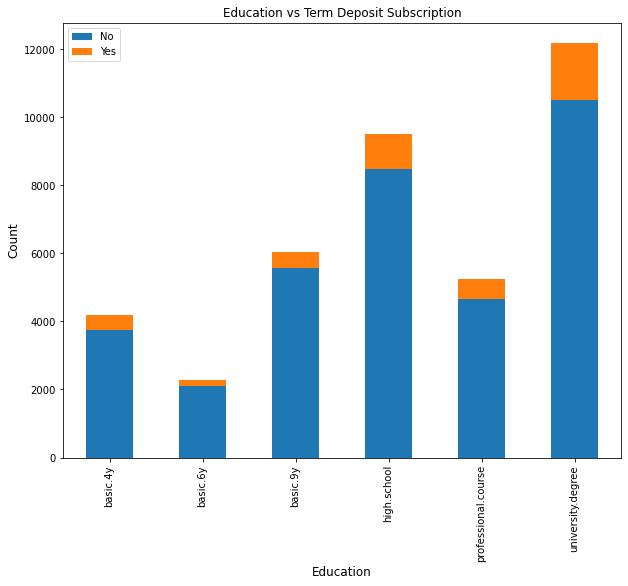

In [15]:
# dropping the "unknown" and "illiterate" row in education
account = account.drop(account[account.education.isin(['unknown', 'illiterate'])].index)

# Stacked bar plot between client education and term deposit subscription
ax = account.groupby(["education", "y"]).size().unstack().plot(kind = "bar", stacked = True, figsize = (10, 8)) # increasing size with a width of 10 in and height of 8 in

# Adding plot title and labels
plt.title("Education vs Term Deposit Subscription", fontsize = 12)
plt.legend(["No", "Yes"])
plt.xlabel("Education", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

plt.show()

In [30]:
# creating a new DataFrame with counts and decimal values 
education_table = pd.DataFrame({'Count': education_count, 'Decimal': education_decimal})

# creating education table
education_table['Yes'] = account[account['y'] == 'yes']['education'].value_counts() / len(account[account['y'] == 'yes'])
education_table['No'] = account[account['y'] == 'no']['education'].value_counts() / len(account[account['y'] == 'no'])

# keeping only the Yes and No columns using .loc
education_table = education_table.loc[:, ['Yes', 'No']]

print(education_table)

                          Yes        No
university.degree    0.380844  0.299481
high.school          0.235120  0.242027
basic.9y             0.107868  0.158955
professional.course  0.135690  0.132595
basic.4y             0.097605  0.106921
basic.6y             0.042873  0.060022


### Relationship between Housing & Term Deposit Subscription 

Clients who owe housing loans have a slightly higher term deposit subscription rate **(11.6%)** compared to clients without housing loans **(10.8%)**. 

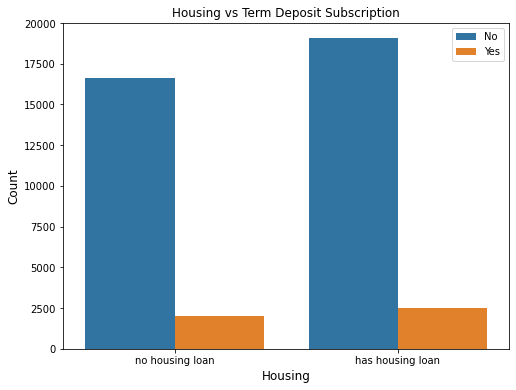

In [5]:
# dropping the "unknown" row in housing
account = account.drop(account[account.housing.isin(["unknown"])].index)

# Replacing "yes" and "no" with "has housing loan" and "no housing loan"
account['housing'] = account['housing'].replace({'yes': 'has housing loan', 'no': 'no housing loan'})

plt.figure(figsize=(8, 6)) #increase plot size with a width of 10 in and height of 8 in
sns.countplot(data=account, x='housing', hue='y')

# Adding plot title and labels
plt.title("Housing vs Term Deposit Subscription", fontsize = 12)
plt.legend(["No", "Yes"])
plt.xlabel("Housing", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

plt.show()

In [24]:
#Crosstab table of housing
housing_table = pd.crosstab(account['housing'], account['y'], normalize='index')
print(housing_table)

y                       no       yes
housing                             
has housing loan  0.883806  0.116194
no housing loan   0.891204  0.108796


### Relationship between Loans & Term Deposit Subscription 

Clients with no personal loans are more likely to subscribe to a term deposit **(11.3%)** compared to clients with personal loans **(10.9%)**.

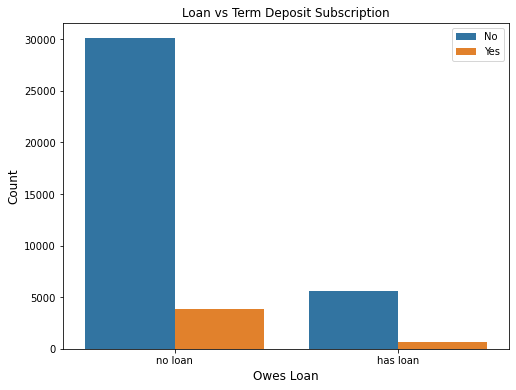

In [25]:
# Dropping the "unknown" row in loan
account = account.drop(account[account.loan.isin(["unknown"])].index)

# Replacing "yes" and "no" with "has loan" and "no loan"
account['loan'] = account['loan'].replace({'yes': 'has loan', 'no': 'no loan'})

plt.figure(figsize=(8, 6)) #increase plot size with a width of 10 in and height of 8 in
sns.countplot(data=account, x='loan', hue='y')

# Adding plot title and labels
plt.title("Loan vs Term Deposit Subscription", fontsize = 12)
plt.legend(["No", "Yes"])
plt.xlabel("Owes Loan", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

plt.show()

In [26]:
# Crosstab table of loans
loan_table = pd.crosstab(account['loan'], account['y'], normalize='index')
print(loan_table)

y               no       yes
loan                        
has loan  0.890685  0.109315
no loan   0.886598  0.113402


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Part 3: Utilizing Decision Tree (Random Forest)

### Random Forest Defined
"Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in R and Python" - [CF](https://careerfoundry.com/en/blog/data-analytics/what-is-random-forest/)

### Reason for utilizing Random Forest
- has high accuracy since it builds multiple decision trees instead of one 
- produces good predictions that can be understood easily
- can handle large datasets efficiently




## Step 1: Converting Categorical Values into Numeric Values 
A random forest model requires numerical values to able to predict the given data. Before conducting a random forest, we need to convert the categorical values from our variables of interest. 


In [32]:
# COPYING THE DATAFRAME INTO A COPY VARIABLE: account_copy
account_copy = account[['age', 'marital', 'job', 'education', 'housing', 'loan', 'y']].copy()

# CONVERTING CATEGORICAL VALUES INTO NUMERIC VALUES
account_copy['marital'] = account_copy['marital'].astype('category').cat.codes #converting the categorical values in the marital column to numeric values
account_copy['job'] = account_copy['job'].astype('category').cat.codes #converting the categorical values in the job column to numeric values 
account_copy['education'] = account_copy['education'].astype('category').cat.codes #converting the categorical values in the education column to numeric values
account_copy['housing'] = account_copy['housing'].astype('category').cat.codes #converting the categorical values in the y column to numeric values
account_copy['loan'] = account_copy['loan'].astype('category').cat.codes #converting the categorical values in the y column to numeric values
account_copy['y'] = account_copy['y'].astype('category').cat.codes #converting the categorical values in the y column to numeric values

# Renaming "y" to "subscribed?" since "y" label is confusing
account_copy.rename(columns = {"y":"subscribed?"}, inplace = True)

account_copy.head()

,age,marital,job,education,housing,loan,subscribed?
0,56,1,3,0,0,0,0
1,57,1,7,3,0,0,0
2,37,1,7,3,2,0,0
3,40,1,0,1,0,0,0
4,56,1,7,3,0,2,0


## Step 2: Importing Random Forest and Training Data
Once the categorical variables are converted into numerical variables, we can start creating the random forest model. To start off, we need to first import the required random forest classes and split our dataset to a training and testing set. In addition, implementing the RandomOverSampler function is necessary to fix data imbalance. By balancing out the dataset, our model won't be able to make biased predictions.

- majority class = clients who didn't subscribed 
- miniority class = clients who did subscribed

In [19]:
# IMPORTING RANDOM FOREST CLASS 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import RandomOverSampler # Importing oversample to prevent dataset imbalance 

X = account_copy.drop(labels=['subscribed?'], axis = 1) # keeping every column in account copy except the 'subcribed?'' column 
y = account_copy['subscribed?'] # assigning the 'subcribed?' column to Y

# Oversampling the minority class (clients who subcribed) since the majority class is clients who didn't subscribe
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Splitting resampled dataset into 70% train and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Instatiate a random forest classifier as 'rf' with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

## Step 3: Random Forest Accuracy
We then need to evaulate the accuracy score of our model. The accuaracy score helps us evaluate our model's performance in predicting the selected variables. An accuracy score close to 100% is much preferred, meaning the model is performing well. Based on the score below, our random forest model has an approximate **75%** accuracy, which is a good sign to proceed further to the next steps.

In [7]:
from sklearn.metrics import accuracy_score 

# TRAINING THE RANDOM FOREST MODEL
rf.fit(X_train, y_train)

# Predicting the test set labels 'y_pred'
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Random Forest Accuracy:', accuracy)

Random Forest Accuracy: 0.7544347667472296


## Step 4: Confusion Matrix/ Classification Report
Although our accuracy score is approximately **75%**, I wanted to double check the model's performance with the confusion matrix and classification report. 

From the Confusion Matrix below:
- **7,488 (top left)** and **9,056 (bottom right)** are the positive (actual) predictions the model made
    - 9,056 clients subscribed
    - 7,488 clients didn't subscribe
- **3,517 (top right)** and **1,868 (bottom left)** are the negative (incorrect) predictions the model made
    - 3,517 clients didn't subscribe
    - 1,868 clients did subscribe
    
Based on the Confusion Matrix, there's no need to be concerned about an imbalanced dataset thanks to the use of the RandomOverSampler function from step 2.  

Looking at the Classification Report, we can make the following observations:
- **Precision**
    - **80%** of the predicted outcomes were classified negative
    - **72%** of the predicted outcomes were classified positive
- **Recall**
    - **68%** of the negative outcomes were identified as "didn't subcribe"
    - **83%** of the positive outcomes were identified as "subscribed"
- **f1-score**
    - weighted average for the "didn't subcribe" group was **74%**
    - weighted average for the "subscribed" group was **77%**
- **accuracy**
    - overall accuracy of the random forest model is **75%**
- **macro avg**
    - precision, recall, and f1-score were around **75-76%**
    
   
Overall, the random forest model performed well in predicting clients who subscribed, but there is room for improvement if given more time. Looking at the AUC score in the ROC curve plot, we obtained a score of **(0.84 or 84%)** which indicates the model performance is acceptable. 

In [13]:
# Predict and calculate the test set 
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Did not subscribe', 'Subscribed']))

[[7488 3517]
 [1868 9056]]
                   precision    recall  f1-score   support

Did not subscribe       0.80      0.68      0.74     11005
       Subscribed       0.72      0.83      0.77     10924

         accuracy                           0.75     21929
        macro avg       0.76      0.75      0.75     21929
     weighted avg       0.76      0.75      0.75     21929



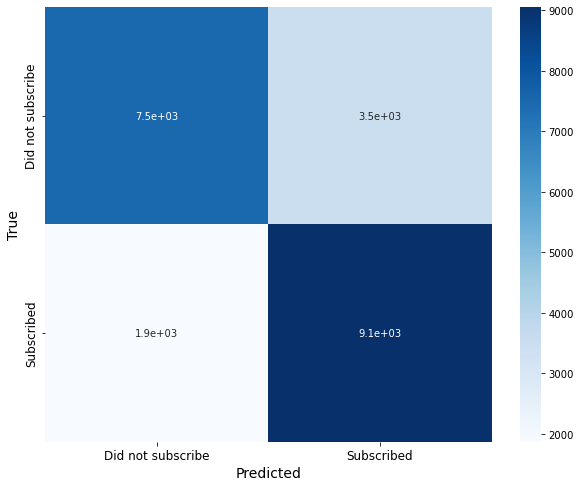

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Did not subscribe', 'Subscribed']

# Setting figure size
plt.figure(figsize=(10, 8))

# Plotting heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

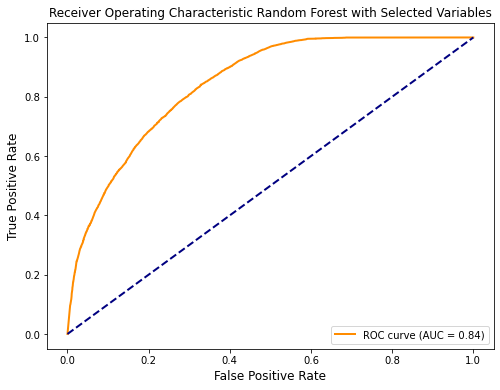

In [23]:
from sklearn.metrics import roc_curve, auc

# Predicted probabilities for test set
y_scores = rf.predict_proba(X_test)[:, 1]

# Calculating false/true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic Random Forest with Selected Variables', fontsize=12)
plt.legend(loc="lower right")
plt.show()

## Step 5: Collecting Feature Importance
After evaluating the model performance, I wanted to go back at the random forest model with Feature Importance. Feature importance helps us understand which selected variable has the most influence on our model. Based on the feature importance:  
- age has the most influence plus the highest importance at approximately **60%**
- job has the second most influence at approximately **17%**
- education has the third most influence at approximately **11%**
- marital has the third least influence at approximately **5%**
- housing has the second least influence at approximately **3%**
- loan has the least importance at **3%**

In [8]:
# COLLECTING FEATURE IMPORTANCES

importances = rf.feature_importances_

feat_importances = pd.DataFrame(importances, index = X_train.columns, columns = ['Importance'])
feat_importances = feat_importances.sort_values(by ='Importance', ascending = False)

print(feat_importances)

           Importance
age          0.604859
job          0.168357
education    0.112500
marital      0.049892
housing      0.032698
loan         0.031693


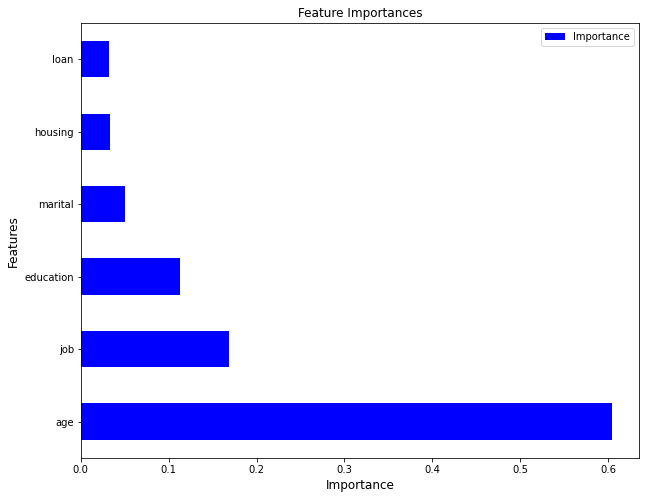

In [9]:
import matplotlib.pyplot as plt

# Creating horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 5)) # set the figure size
feat_importances.plot.barh(ax=ax, color = 'blue', figsize = (10,8))

# Adding axis labels 
ax.set_xlabel('Importance', fontsize = 12)
ax.set_ylabel('Features', fontsize = 12)
ax.set_title('Feature Importances', fontsize = 12)

plt.show()

## Step 6: Feature Importance Analysis
Based on the feature importance graph created from the random forest model, we can see **age has the highest importance rate with approximately 60%** and **job being the second highest with 17%**. Since my business question revolves around these two selected variables, it's best to conduct further analysis. To do so, I created two crosstab tables for each of my selected variable. 

### Age Crosstab Table
  
The first crosstab table consist of the relation with age group and term deposit subscription. Although I already conducted an analysis between age and term deposit subscription with a histogram, I wanted to categorize the ages into age groups to find any relevant patterns. The crosstab table consist of five age groups:  
- **Teen (age 13-17)**
- **Young Adult (age 18-20)**
- **Official Adult (age 21-29)**
- **Middle Age (age 30-60)**
- **Elderly (age 65, 100)**

Based on the age crosstab table, we can make the following observations:
- The percentage calculation is based on total # of yes response divided by total of yes and no responses   
  - **Ex**
      - Teen group calculation
      - 14 / (14 + 19) 
      - 14 / 33 
      - 0.4242 * 100 
      - 42.42
- Looking at the counts column, the **middle age group** has the highest count of term deposit subscription with **3,226 clients** but a subscription rate of **9.72%**
- The **official adults group** has the second highest term deposit subscription count with **1,038 clients** but a subscription rate of **14.54%**
- The **teen** and **elderly** group has the highest subscription rate out of all other age groups with **42.42%** and **46.85%**
    - High subscription rate may be due to a closely distributed amount of yes and no responses compared to other age groups

### Job Crosstab Table  

The second crosstab table consist of the relation with job group and term deposit subscription. Similar to the previous age histogram analysis, I wanted to dive a bit deeper with the job group by categorizing the job roles between:  

- **Blue collar**  
    - blue collar
    - technician
    - services
- **White collar**
    - management
    - admin
- **Other**
    - retired
    - self-employed
    - entrepreneur
    - unemployed
    - housemaid
    - student
    - unknown

Focusing on blue collar and white collar jobs, we can make the following observations on the job crosstab table:  
- looking at the counts column, **blue-collar jobs** has the highest count of term deposit subscription with **911** clients and the highest subscription rate with **15.02%**
- **White-collar jobs** has the lowest count of term deposit subscription with **230** clients and subscription rate with **9.14%**

In [12]:
# Defining the age group ranges and labels
age_ranges = [(13, 17), (18, 20), (21, 29), (30, 60), (65, 100)]
age_labels = ['Teen', 'Young Adult', 'Official Adult', 'Middle Age', 'Elderly']

# assigning an age group label to each row based on age_ranges and age_labels
account_copy['age_group'] = pd.cut(account_copy['age'], bins=[r[0] for r in age_ranges] + [age_ranges[-1][-1]], labels=age_labels)

# crosstab table between subscription status and age group
age_sub = pd.crosstab(account_copy['age_group'], account_copy['subscribed?'])

# Calculation of the percentage of subscribers in each age group
age_sub['Subscribed %'] = age_sub[1] / (age_sub[0] + age_sub[1]) * 100

# Formatting the 'Subscribed %' column as a string with two decimal places 
age_sub['Subscribed %'] = age_sub['Subscribed %'].map('{:.2f}%'.format)

# Renaming 0 and 1 with 'No' and 'Yes'
age_sub = age_sub.rename(columns={0:'No', 1:'Yes'})

print(age_sub)

subscribed?        No   Yes Subscribed %
age_group                               
Teen               19    14       42.42%
Young Adult       137    72       34.45%
Official Adult   6103  1038       14.54%
Middle Age      29960  3226        9.72%
Elderly           329   290       46.85%


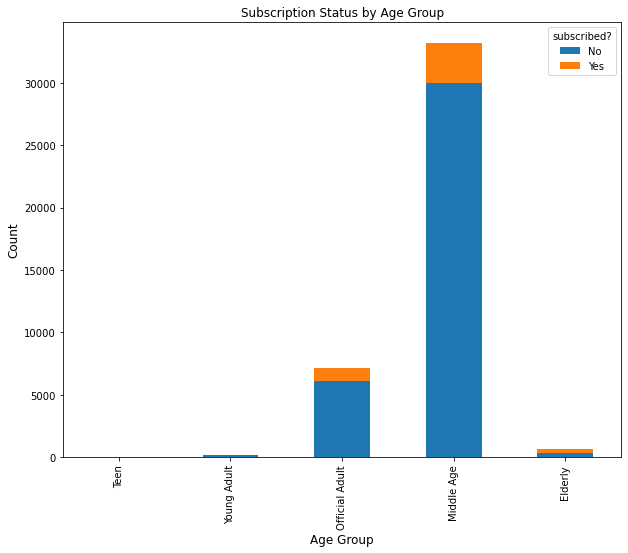

In [13]:
import matplotlib.pyplot as plt

# Creating the stacked bar chart
age_sub[['No', 'Yes']].plot(kind='bar', stacked=True, figsize = (10, 8))

# chart title and label
plt.title('Subscription Status by Age Group', fontsize = 12)
plt.xlabel('Age Group', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.show()

In [26]:
# Defining a dictionary that maps job titles to numeric values
job_map = {
    'management': 1,
    'admin.': 2,
    'blue-collar': 3,
    'technician': 4,
    'services': 5,
    'retired': 6,
    'self-employed': 7,
    'entrepreneur': 8,
    'unemployed': 9,
    'housemaid': 10,
    'student': 11,
    'unknown': 12
}

# applying mapping to the job column
account_copy['job_code'] = account_copy['job'].map(job_map)

# Defining job group ranges and labels
job_group_ranges = [(1,2), (3, 4, 5,), (6,7,8,9,10,11,12)]
job_group = ['White-collar jobs', 'Blue-collar jobs', 'Other']

In [27]:
# assigning an job group label to each row based on job_ranges and job_labels
account_copy['job_group'] = pd.cut(account_copy['job'], bins=[r[0] for r in job_group_ranges] + [job_group_ranges[-1][-1]], labels=job_group)

# crosstab table between subscription and job group
job_sub = pd.crosstab(account_copy['job_group'], account_copy['subscribed?'])

# Calculation of percentage of subscribers within each job group
job_sub['Subscribed %'] = job_sub[1] / (job_sub[0] + job_sub[1]) * 100

# Formatting the 'Subscribed %' column as a string with two decimal places
job_sub['Subscribed %'] = job_sub['Subscribed %'].map('{:.2f}%'.format)

# Renaming 0 and 1 with 'No' and 'Yes' 
job_sub = job_sub.rename(columns={0:'No', 1:'Yes'})

print(job_sub)

subscribed?           No   Yes Subscribed %
job_group                                  
White-collar jobs   2286   230        9.14%
Blue-collar jobs    5154   911       15.02%
Other              11422  1509       11.67%


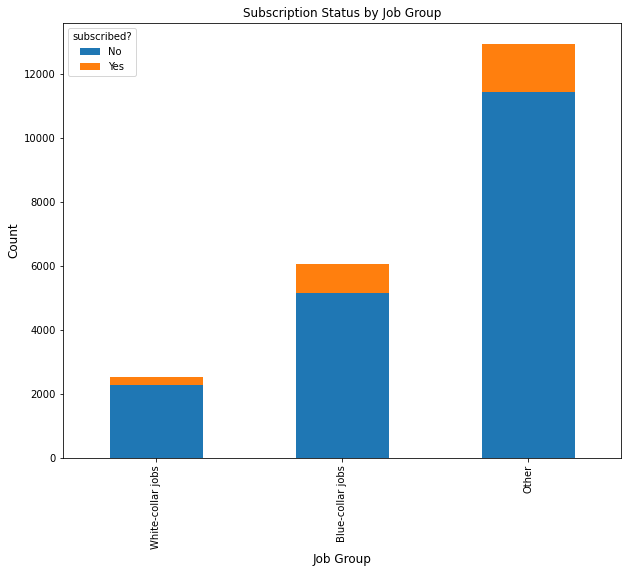

In [17]:
import matplotlib.pyplot as plt

# Creating the stacked bar chart
job_sub[['No', 'Yes']].plot(kind='bar', stacked=True, figsize = (10, 8))

# plot title and label
plt.title('Subscription Status by Job Group', fontsize = 12)
plt.xlabel('Job Group', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.show()